In [8]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.append('../')

import json
from os import path

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

from sklearn import preprocessing
from ONN_SA import ONN
import threading, time

import scipy
from scipy import signal
import DataUtils as dutl

import networkx as nx

#dutils = dutl.DataUtils()
#%matplotlib widget

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


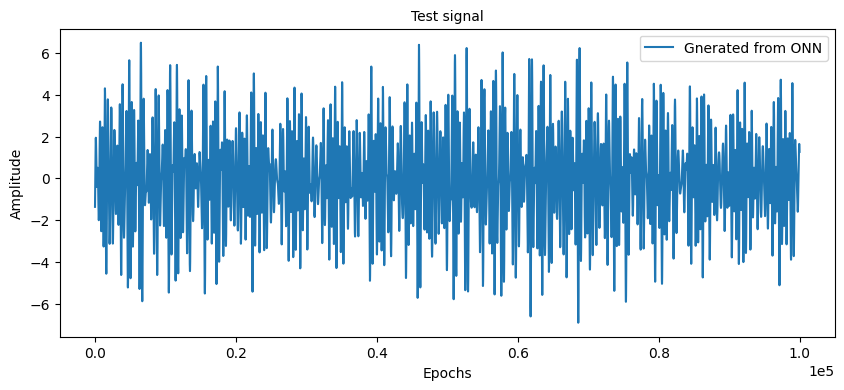

done


In [9]:
o = ONN(N=5, NEPOCHS=20000)

# #vald_signal, vald_signal_, signal_ = o.generate_test_samples()
testSignal = o.generate_test_samples(NSAMPLES=100000)

# print(vald_signal.shape)
f = plt.figure()
f.set_figwidth(10)
f.set_figheight(4)
plt.plot(np.linspace(1, len(testSignal), len(testSignal)), testSignal, label="Gnerated from ONN")
plt.xlabel("Epochs")
plt.ylabel("Amplitude")
plt.title("Test signal")
plt.legend()
plt.show()
print("done")
# scalar = preprocessing.MinMaxScaler(feature_range=(-3, 3))
# scaled_data = testSignal 
# time = np.linspace(1, len(scaled_data), len(scaled_data))

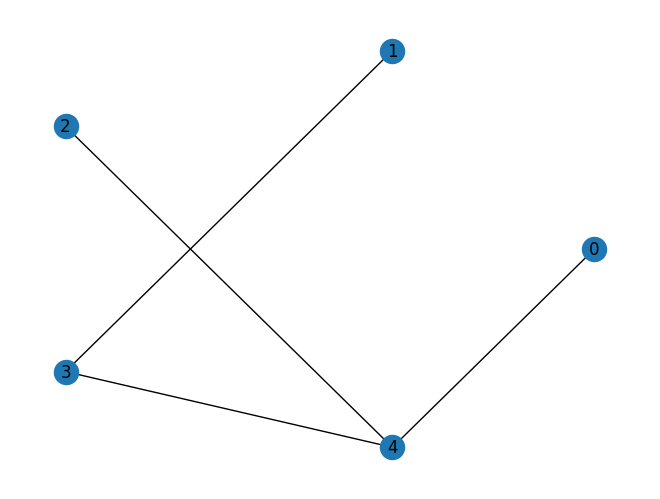

In [10]:
# Create a graph from the adjacency matrix
G = nx.from_numpy_array(o.A_Test)

# Draw the graph
pos = nx.circular_layout(G)
f = plt.figure()
nx.draw(G, pos, with_labels=True)
plt.show()

In [11]:
o.A_Test

array([[0, 0, 0, 0, 1],
       [0, 0, 0, 1, 0],
       [0, 0, 0, 0, 1],
       [0, 1, 0, 0, 1],
       [1, 0, 1, 1, 0]])

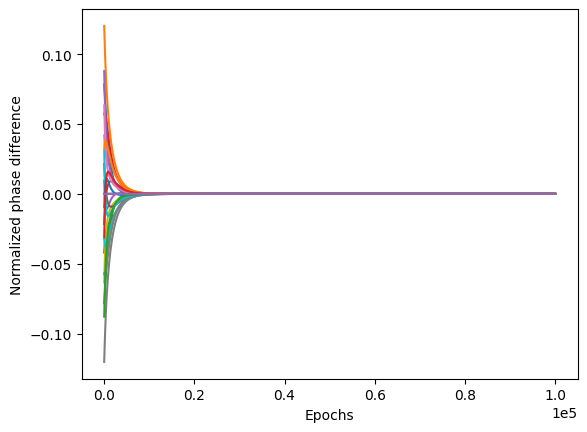

In [12]:
"""
Does increasing weight causes stabalized phase relationship?
"""

epochs = np.linspace(1, o.NSAMPLES, o.NSAMPLES)
f = plt.figure()
plt.xlabel("Epochs")
plt.ylabel("Normalized phase difference")

for i in range(o.N):
    for j in range(o.N):
        plt.plot(epochs, o.phase_diff[:,i,j])
plt.show()

#TODO: Network should have synchronazibilioty property

In [14]:
def Run():
    o.initialize()

    # Assumption: We know forwards weights (alpha), frequency (omega), 
    # and inital phase is for now set as per actual value in the test signal.
    o.ALPHA = o.ALPHA_Test
    o.OMEGA = o.OMEGA_Test
    o.PHI = o.PHI_Test

    # A needs to be adjusted. We know the binary connection but not the strength
    o.A = 0.4*o.A_Test

    o.fit(testSignal)

th1 = threading.Thread(target=Run).start()

[0.4 0.4 0.4 0.4]
Evaluating...


/opt/tljh/user/lib/python3.9/site-packages/scipy/optimize/_optimize.py:353: RuntimeWarning: Values in x were outside bounds during a minimize step, clipping to bounds
  warnings.warn("Values in x were outside bounds during a "


Evaluating...
Evaluating...
Evaluating...
Evaluating...
Evaluating...
Evaluating...
Evaluating...
Evaluating...
Evaluating...
Evaluating...
Evaluating...
Evaluating...
Evaluating...
Evaluating...
Evaluating...
Evaluating...
Evaluating...
Evaluating...
Evaluating...
Evaluating...
Evaluating...
Evaluating...
Evaluating...
Evaluating...
Evaluating...
Evaluating...
Evaluating...
Evaluating...
Evaluating...
Evaluating...
Evaluating...
Evaluating...
Evaluating...
Evaluating...
Evaluating...
Evaluating...
Evaluating...
Evaluating...


In [9]:
o.A

array([[0.        , 0.49671484, 1.72129129, 2.74551249, 2.11628192,
        1.20439616, 1.66762214, 1.76266315, 1.47324714, 3.8476382 ],
       [0.49671484, 0.        , 1.4704275 , 2.51009403, 0.24128291,
        3.37853924, 3.30881087, 3.09346823, 2.2132913 , 2.78372132],
       [1.72129129, 1.4704275 , 0.        , 1.39150687, 1.19541877,
        2.59120613, 3.15198447, 1.70870461, 1.55691131, 2.18037567],
       [2.74551249, 2.51009403, 1.39150687, 0.        , 3.62661525,
        3.13854287, 1.45026802, 2.82561415, 2.21466021, 2.21443571],
       [2.11628192, 0.24128291, 1.19541877, 3.62661525, 0.        ,
        1.66654018, 3.45986108, 3.64115252, 2.01677492, 2.27903975],
       [1.20439616, 3.37853924, 2.59120613, 3.13854287, 1.66654018,
        0.        , 1.86650184, 1.16099855, 1.2315891 , 0.76180798],
       [1.66762214, 3.30881087, 3.15198447, 1.45026802, 3.45986108,
        1.86650184, 0.        , 1.87690016, 2.49929386, 1.47950574],
       [1.76266315, 3.09346823, 1.7087046

In [61]:
#Things to check
# 1. How important the inital setting of phase is? 
# Ans: Can the way EEG signal recorded be used to set the inital phases of oscillator accordingly?
# 2. Also what about omega? How important inital condition for OMEGA is?
# 3. Without normalized phase difference, does this learning work?

100.0

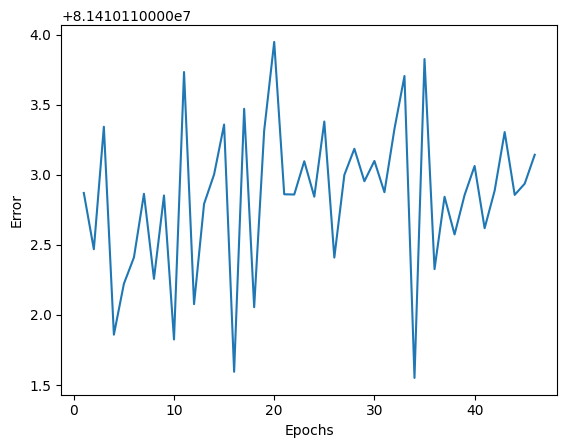

In [8]:
#Error with each epoch
epoch = len(o.ERR)
f = plt.figure()
plt.plot(np.linspace(1, epoch, epoch), o.ERR)
plt.xlabel("Epochs")
plt.ylabel("Error")
plt.show()

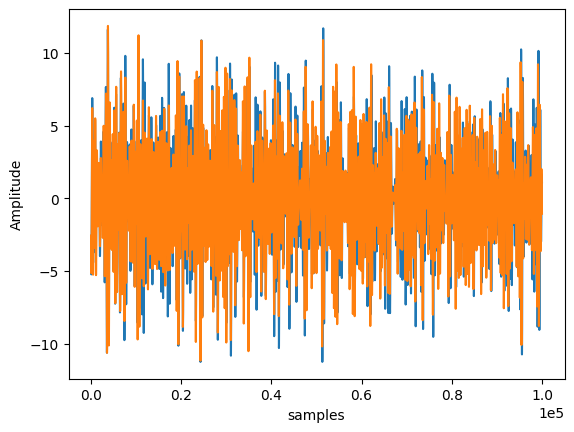

In [38]:
#Reconstructed signal
reconstructedSignal = o.generate_samples(o.NSAMPLES, 1/o.SAMPLING_RATE, 
                                         o.R, o.PHI, o.OMEGA, o.A, o.ALPHA)
f = plt.figure()
plt.plot(np.linspace(1, o.NSAMPLES, o.NSAMPLES), reconstructedSignal, label="Reconstructed")
plt.plot(np.linspace(1, o.NSAMPLES, o.NSAMPLES), testSignal, label="Test")
plt.xlabel("samples")
plt.ylabel("Amplitude")
plt.show()

In [ ]:
#TODO:
#Try two things - Genetic algorithm, Recording from multiple sites